# Assigment 3

### MACS 30000, Dr. Evans
### Haowen Shang

Due Wednesday, Oct. 24 at 11:30 AM

####  1. Simulation in Sociology, Moretti (2002)

Please see PDF version.

#### 2. Simulating the income

In [39]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

#### (a) Simulate the lifetime income. Plot one of the lifetime income paths.

In [40]:
def income_sim(p):
    '''
    Requires a simulation profile, structured as a dictionary

    p = {
         'inc0': 80000,             #average starting income
         'P': 0.4,                      #positive dependence of today's income on 
                                           last period's income
         'g': 0.025,                   #long-run annual growth rate of income 
         'st_year': int(2020),       #start year
         'work_years': 40,          #years to work
         'a': 0,                          #mean of the log of the error term
         'Sigma' :0.13,               #standard deviation of the log of the error term          
         'num_draws': 10000      #simulations
         }
    '''
    
    #set random seed
    np.random.seed(524)

    log_errors = np.random.normal(p['a'], p['Sigma'], (p['work_years'], 
                                                       p['num_draws']))

    #create a matrix of dimension (work_years, num_draws)
    ln_inc_mat = np.zeros((p['work_years'], p['num_draws']))

    #fill the matrix
    ln_inc_mat[0, :] = np.log(p['inc0']) + log_errors[0, :]

    #loop and apply model
    for yr in range(1, p['work_years']):
        ln_inc_mat[yr, :] = ln_inc_mat[yr, :] = ((1 - p['P']) * (np.log(p['inc0']) + 
                                p['g'] * (yr)) + p['P'] * ln_inc_mat[yr - 1, :] +
                                log_errors[yr, :])
        
    #translate the log value back into income
    inc_mat = np.exp(ln_inc_mat) 
    return inc_mat

In [41]:
simulation_profile = {
         'inc0': 80000,              #average starting income
         'P': 0.4,      #positive dependence of today's income on last period's income
         'g': 0.025,                   #long-run annual growth rate of income 
         'st_year': int(2020),       #start year
         'work_years': 40,          #years to work
         'a': 0,                          #mean of the log of the error term
         'Sigma' :0.13,              #standard deviation of the log of the error term          
         'num_draws': 10000      #simulations
         }

inc_mat = income_sim(simulation_profile)
print(inc_mat)   

[[ 66409.15585396  98274.13534194 101939.81109509 ...  98720.39690442
   72404.51636886  68710.32820307]
 [ 80020.53020329  67383.19350738  84557.85626308 ...  68247.7770509
   74518.33613244  80555.96068584]
 [ 75805.26636606  66134.42494243  91458.20304692 ...  67268.53350159
   90012.42673528  80645.62355527]
 ...
 [272690.56519108 217821.73027242 184724.24512469 ... 159922.45424852
  253961.68337673 209741.55004062]
 [231539.17420799 202509.15149494 197955.96626493 ... 199502.43481758
  210951.71828579 205420.27946389]
 [197895.95201384 165115.10025278 172644.86927513 ... 248654.44847819
  234237.14656466 221566.29879732]]


Text(0,0.5,'Annual income (\\$s)')

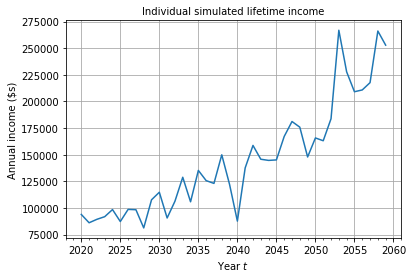

In [42]:
#plot the histogram
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['work_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, inc_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

#### (b) Plot a histogram and analyse

Text(0.5,1,'Initial income for simulations')

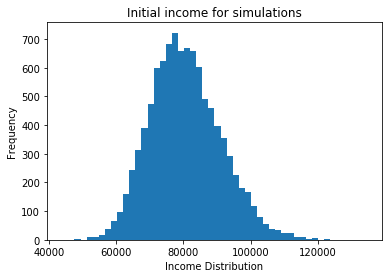

In [43]:
plt.hist(inc_mat[0,:], bins=50)
plt.xlabel("Income Distribution")
plt.ylabel("Frequency")
plt.title("Initial income for simulations")

In [44]:
# calculate the percent of the class will earn more than $100,000 
#in the first year out of the program
inc_more = (inc_mat[0, :] > 100000).sum() / 10000
print("The percent of the class will earn more than $100,000 in the first year out of the program is {:.2f}%".format(inc_more*100))

The percent of the class will earn more than $100,000 in the first year out of the program is 4.17%


The percent of the class will earn more than $100,000 in the first year out of the program is 4.17%.

In [45]:
# calculate the percent of the class will earn less than $70,000 
#in the first year out of the program
inc_less = (inc_mat[0, :] < 70000).sum() / 10000
print("The percent of the class will earn less than $70,000 in the first year out of the program is {:.2f}%".format(inc_less*100))

The percent of the class will earn less than $70,000 in the first year out of the program is 15.12%


The percent of the class will earn less than $70,000 in the first year out of the program is 15.12%.

The distrubution is slightly right-skewed, but overall the distrubution is approximately normal.

#### (c) years to pay off 95,000 of zero-interest debt with initial income = 80000

Text(0.5,1,'Histogram for years to payoff loan')

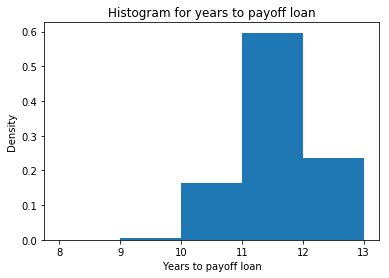

In [46]:
#Creating a matrix create a matrix of payoff (dimension (num_draws, work_years))
payoff_mat = np.zeros((p["num_draws"], p["work_years"]))

#loop and fill the matrix
for yr in range(0, p["work_years"]):
    payoff_mat[: , yr] = inc_mat[yr, :] * 0.1

#create a list of how many years it takes to pay off the loan in  10,000 simulations
payoff_yr = []
for row in payoff_mat:
    yr = 0
    total = 0
    for i in row:
        yr = yr +1
        total = total + i
        if total >= 95000:
            payoff_yr.append(yr)
            break
            
#plot the histogram
plt.hist(payoff_yr, density = True, 
         bins = np.arange(min(payoff_yr) - 1, max(payoff_yr) + 1))
plt.xlabel(r'Years to payoff loan')
plt.ylabel(r'Density')
plt.title(r'Histogram for years to payoff loan')

In [47]:
#calculate the percent of the simulations who is able to pay off the loan in 10 years (on or before t = 2029)
count = 0
for yr in payoff_yr:
    if yr <= 10:
        count = count + 1
percentage = count/10000
print("percent of the simulations of people who is able to pay off the loan in 10 years is {:.2f}%".format(percentage*100))

percent of the simulations of people who is able to pay off the loan in 10 years is 16.78%


The percent of the simulations of people who is able to pay off the loan in 10 years is 16.78%.

#### (d) years to pay off 95,000 of zero-interest debt with initial income = 90000

In [48]:
#modify the income matrix
new_simulation_profile = {
         'inc0': 90000,             #average starting income
         'P': 0.4,      #positive dependence of today's income on last period's income
         'g': 0.025,                   #long-run annual growth rate of income 
         'st_year': int(2020),       #start year
         'work_years': 40,          #years to work
         'a': 0,                          #mean of the log of the error term
         'Sigma' :0.13,           #standard deviation of the log of the error term          
         'num_draws': 10000      #simulations
         }

inc_mat_modified = income_sim(new_simulation_profile)
print(inc_mat_modified)   

[[ 74710.30033571 110558.40225969 114682.28748197 ... 111060.44651748
   81455.08091496  77299.11922846]
 [ 90023.0964787   75806.0926958   95127.58829597 ...  76778.74918227
   83833.128149    90625.45577157]
 [ 85280.92466182  74401.22806023 102890.47842778 ...  75677.10018929
  101263.9800772   90726.32649968]
 ...
 [306776.88583997 245049.44655647 207814.77576527 ... 179912.76102958
  285706.89379882 235959.2437957 ]
 [260481.57098399 227822.7954318  222700.46204805 ... 224440.23916978
  237320.68307151 231097.81439688]
 [222632.94601557 185754.48778437 194225.47793452 ... 279736.25453796
  263516.78988524 249262.08614698]]


Text(0.5,1,'Histogram for years to payoff loan')

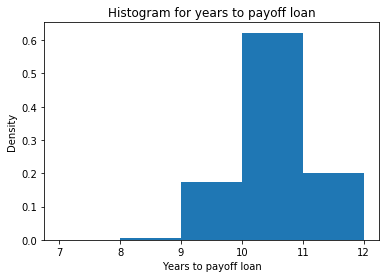

In [49]:
#Creating a matrix create a matrix of payoff (dimension (num_draws, work_years))
payoff_mat_modified = np.zeros((p["num_draws"], p["work_years"]))

#loop and fill the matrix
for yr in range(0, p["work_years"]):
    payoff_mat_modified[: , yr] = inc_mat_modified[yr, :] * 0.1

#create a list of how many years it takes to pay off the loan in 10,000 simulations
payoff_yr_modified = []
for row in payoff_mat_modified:
    yr = 0
    total = 0
    for i in row:
        yr = yr +1
        total = total + i
        if total >= 95000:
            payoff_yr_modified.append(yr)
            break
            
#plot the histogram
plt.hist(payoff_yr_modified, density = True, 
         bins = np.arange(min(payoff_yr_modified) - 1, max(payoff_yr_modified) + 1))
plt.xlabel(r'Years to payoff loan')
plt.ylabel(r'Density')
plt.title(r'Histogram for years to payoff loan')

In [50]:
#calculate the percent of the simulations who is able to pay off the loan in 10 years (on or before t = 2029)
count = 0
for yr in payoff_yr_modified:
    if yr <= 10:
        count = count + 1
percentage = count/10000
print("percent of the simulations of people who is able to pay off the loan \
in 10 years with initial salary of 90000 is {:.2f}%".format(percentage*100))

percent of the simulations of people who is able to pay off the loan in 10 years with initial salary of 90000 is 79.92%


The percent of the simulations of people who is able to pay off the loan in 10 years with initial salary of 90000 is 79.92%.